<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Step 2: Examine the Structure of the Data

# Display column names
print("Column Names:")
print(df.columns)

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

# Display summary information (e.g., non-null counts, data types)
print("\nSummary Information:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Sum

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [12]:
# Step 1: Identify missing values in the dataset
missing_data = df.isnull().sum()
print("Missing Values in each column:")
print(missing_data)

# Step 2: Impute or remove missing values

# Ensure 'YearsCodePro' is of a numeric type before filling missing values
df_cleaned.loc[:, 'YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')

# Now fill missing values with the median
df_cleaned.loc[:, 'YearsCodePro'] = df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median())

# Option 3: Check if 'JobSat' columns exist, or use related columns like 'JobSatPoints'
# If 'JobSat' does not exist, check other columns such as 'JobSatPoints_6', 'JobSatPoints_7', etc.
if 'JobSat' in df_cleaned.columns:
    # Impute missing values in 'JobSat' with the mode
    df_cleaned.loc[:, 'JobSat'] = df_cleaned['JobSat'].fillna(df_cleaned['JobSat'].mode()[0])
else:
    # Example: You could use 'JobSatPoints_6' as a fallback
    if 'JobSatPoints_6' in df_cleaned.columns:
        df_cleaned.loc[:, 'JobSatPoints_6'] = df_cleaned['JobSatPoints_6'].fillna(df_cleaned['JobSatPoints_6'].mode()[0])

# Option 4: Remove rows with missing target variables (optional based on your analysis)
# df_cleaned = df_cleaned.dropna(subset=['JobSat', 'YearsCodePro'])

# Step 3: Verify missing values after handling
missing_data_after = df_cleaned.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_data_after)


Missing Values in each column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing Values After Handling:
ResponseId          0
MainBranch          0
Age                 0
Employment          0
RemoteWork      10631
                ...  
AIEthics        23889
AIChallenges    27906
TBranch         20960
SurveyLength     9255
SurveyEase       9199
Length: 70, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [13]:
# Step 4: Analyze Key Columns

# Calculate and display the value counts for 'Employment'
employment_counts = df_cleaned['Employment'].value_counts()
print("Employment Distribution:")
print(employment_counts)

# Calculate and display the value counts for 'JobSat' (Job Satisfaction)
if 'JobSat' in df_cleaned.columns:
    job_sat_counts = df_cleaned['JobSat'].value_counts()
    print("\nJob Satisfaction Distribution:")
    print(job_sat_counts)
else:
    print("\n'JobSat' column is not available in the dataset. Consider using related columns like 'JobSatPoints'.")

# Calculate and display the value counts for 'YearsCodePro' (Professional Coding Experience)
# For 'YearsCodePro', we assume it's a numeric column but will treat it categorically for the count
years_code_pro_counts = df_cleaned['YearsCodePro'].value_counts(bins=10)  # Categorize into 10 bins for clarity
print("\nProfessional Coding Experience (YearsCodePro) Distribution:")
print(years_code_pro_counts)


Employment Distribution:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking fo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


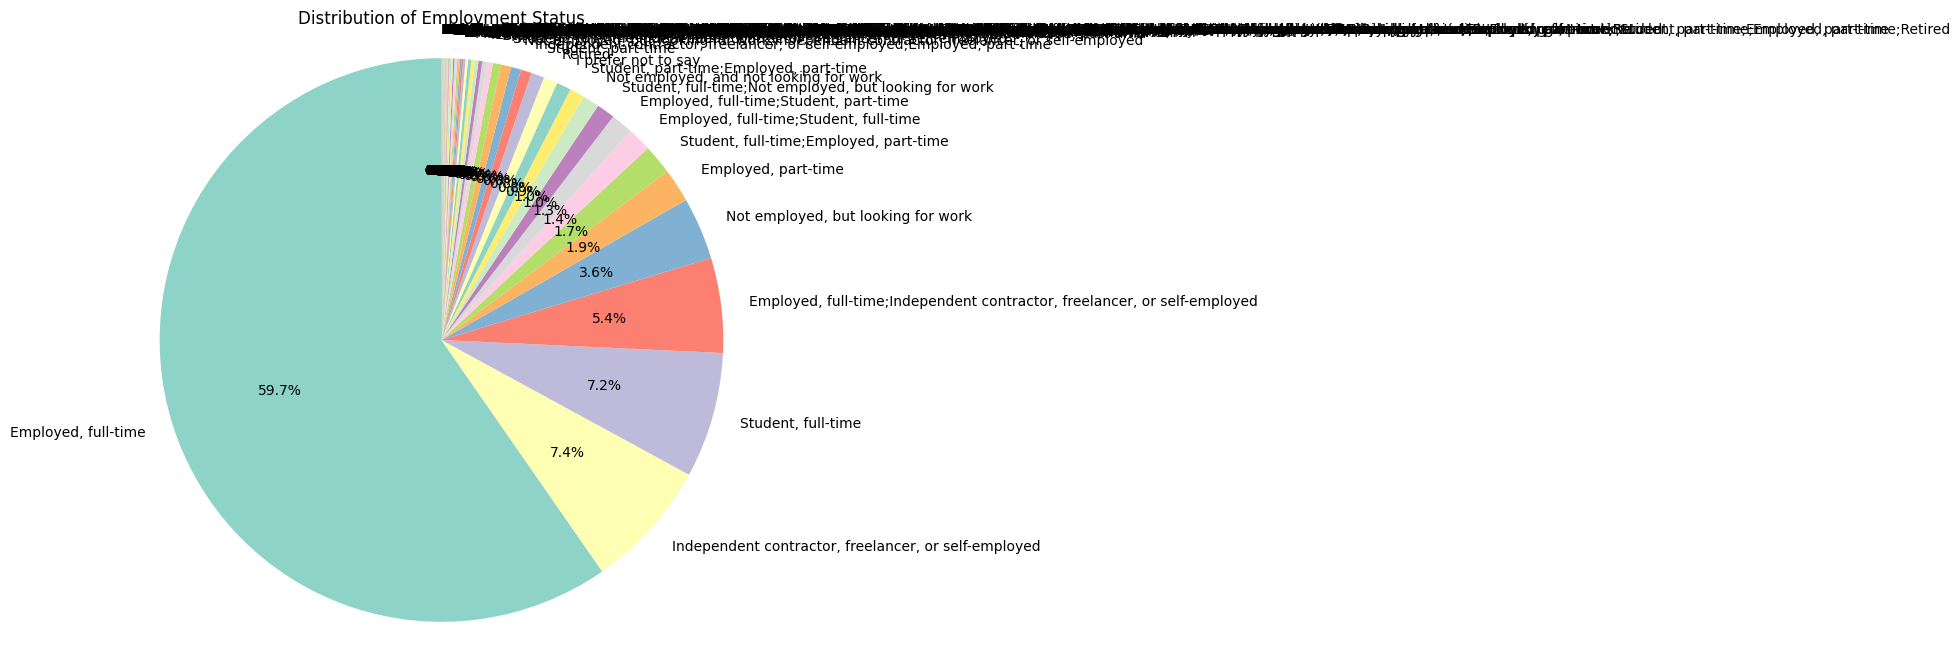

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check the distribution of Employment statuses
employment_counts = df_cleaned['Employment'].value_counts()

# Step 2: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(employment_counts)))
plt.title('Distribution of Employment Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


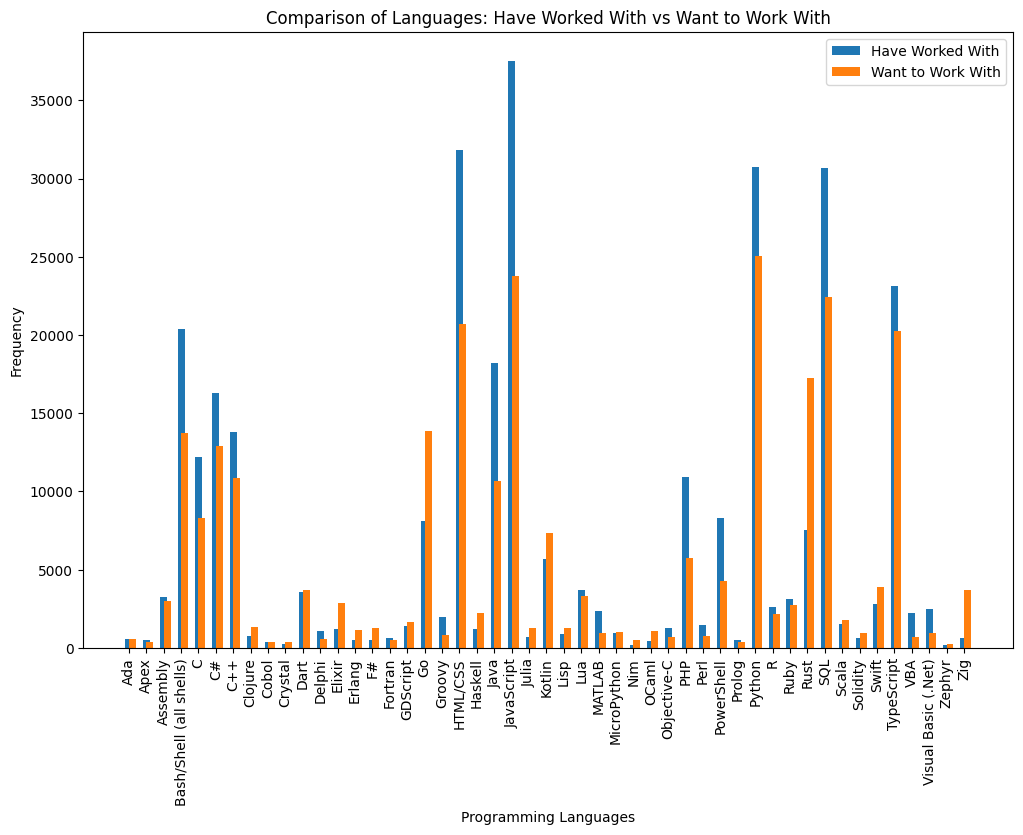

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Step 1: Clean and preprocess the data for both columns
# Split the string of languages into lists of languages for each column
languages_have_worked_with = df_cleaned['LanguageHaveWorkedWith'].dropna().str.split(';').explode().str.strip()
languages_want_to_work_with = df_cleaned['LanguageWantToWorkWith'].dropna().str.split(';').explode().str.strip()

# Step 2: Calculate the frequency of each language in both columns
languages_have_worked_with_freq = Counter(languages_have_worked_with)
languages_want_to_work_with_freq = Counter(languages_want_to_work_with)

# Step 3: Convert the frequency data to DataFrames for easier plotting
df_have_worked = pd.DataFrame(languages_have_worked_with_freq.items(), columns=["Language", "Have Worked With"])
df_want_to_work = pd.DataFrame(languages_want_to_work_with_freq.items(), columns=["Language", "Want to Work With"])

# Merge both dataframes on the 'Language' column
df_merged = pd.merge(df_have_worked, df_want_to_work, on="Language", how="outer").fillna(0)

# Step 4: Plot the grouped bar chart
plt.figure(figsize=(12, 8))

# Bar chart for 'Have Worked With' and 'Want to Work With'
plt.bar(df_merged['Language'], df_merged['Have Worked With'], width=0.4, label='Have Worked With', align='center')
plt.bar(df_merged['Language'], df_merged['Want to Work With'], width=0.4, label='Want to Work With', align='edge')

plt.xticks(rotation=90)
plt.xlabel("Programming Languages")
plt.ylabel("Frequency")
plt.title("Comparison of Languages: Have Worked With vs Want to Work With")
plt.legend()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1200x800 with 0 Axes>

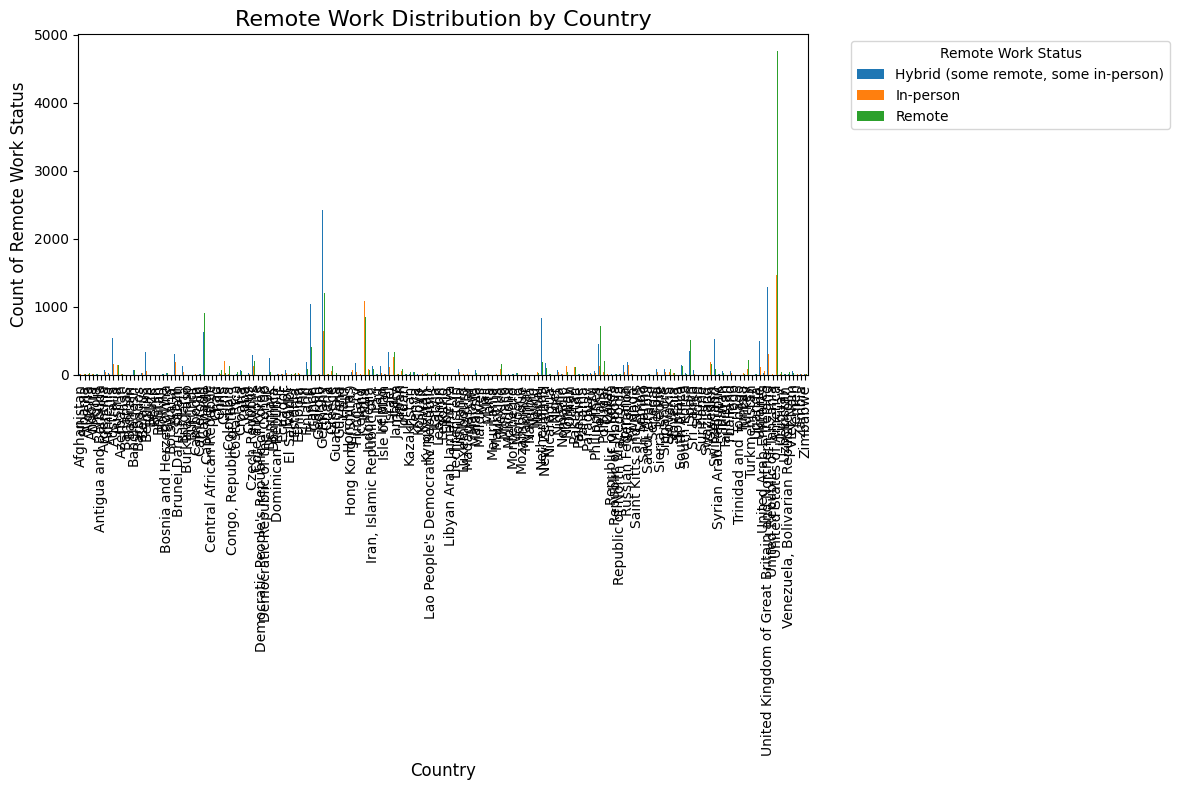

In [24]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean the data by removing NaN values in the 'RemoteWork' and 'Country' columns
df_cleaned_remote = df_cleaned.dropna(subset=['RemoteWork', 'Country'])

# Step 2: Count the number of occurrences of each RemoteWork status by Country
remote_work_counts = df_cleaned_remote.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')

# Step 3: Pivot the data to get separate columns for each RemoteWork status
remote_work_pivot = remote_work_counts.pivot(index='Country', columns='RemoteWork', values='Count').fillna(0)

# Step 4: Plot the grouped bar chart
plt.figure(figsize=(12, 8))
remote_work_pivot.plot(kind='bar', stacked=False, figsize=(12, 8))

plt.title('Remote Work Distribution by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count of Remote Work Status', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Remote Work Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [32]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Step 1: Clean and prepare the data
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')

# Step 2: Map OrgSize to numerical scale (approximate scaling)
orgsize_mapping = {
    'Just me - I am a freelancer, sole proprietor, etc.': 1,
    '2 to 9 employees': 2,
    '10 to 19 employees': 3,
    '20 to 99 employees': 4,
    '100 to 499 employees': 5,
    '500 to 999 employees': 6,
    '1,000 to 4,999 employees': 7,
    '5,000 to 9,999 employees': 8,
    '10,000 or more employees': 9
}
df_cleaned['OrgSizeMapped'] = df_cleaned['OrgSize'].map(orgsize_mapping)

# Step 3: Subset the DataFrame to only valid rows
subset_df = df_cleaned[['YearsCodePro', 'OrgSizeMapped']].dropna()

# Check for enough data
if len(subset_df) < 2:
    print(f"❌ Not enough valid data to compute correlation. Only {len(subset_df)} valid row(s) found.")
else:
    # Step 4: Calculate both Pearson and Spearman correlation
    pearson_corr, _ = pearsonr(subset_df['YearsCodePro'], subset_df['OrgSizeMapped'])
    spearman_corr, _ = spearmanr(subset_df['YearsCodePro'], subset_df['OrgSizeMapped'])

    print(f"✅ Pearson correlation: {pearson_corr:.3f}")
    print(f"✅ Spearman correlation: {spearman_corr:.3f}")


✅ Pearson correlation: 0.001
✅ Spearman correlation: 0.034


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


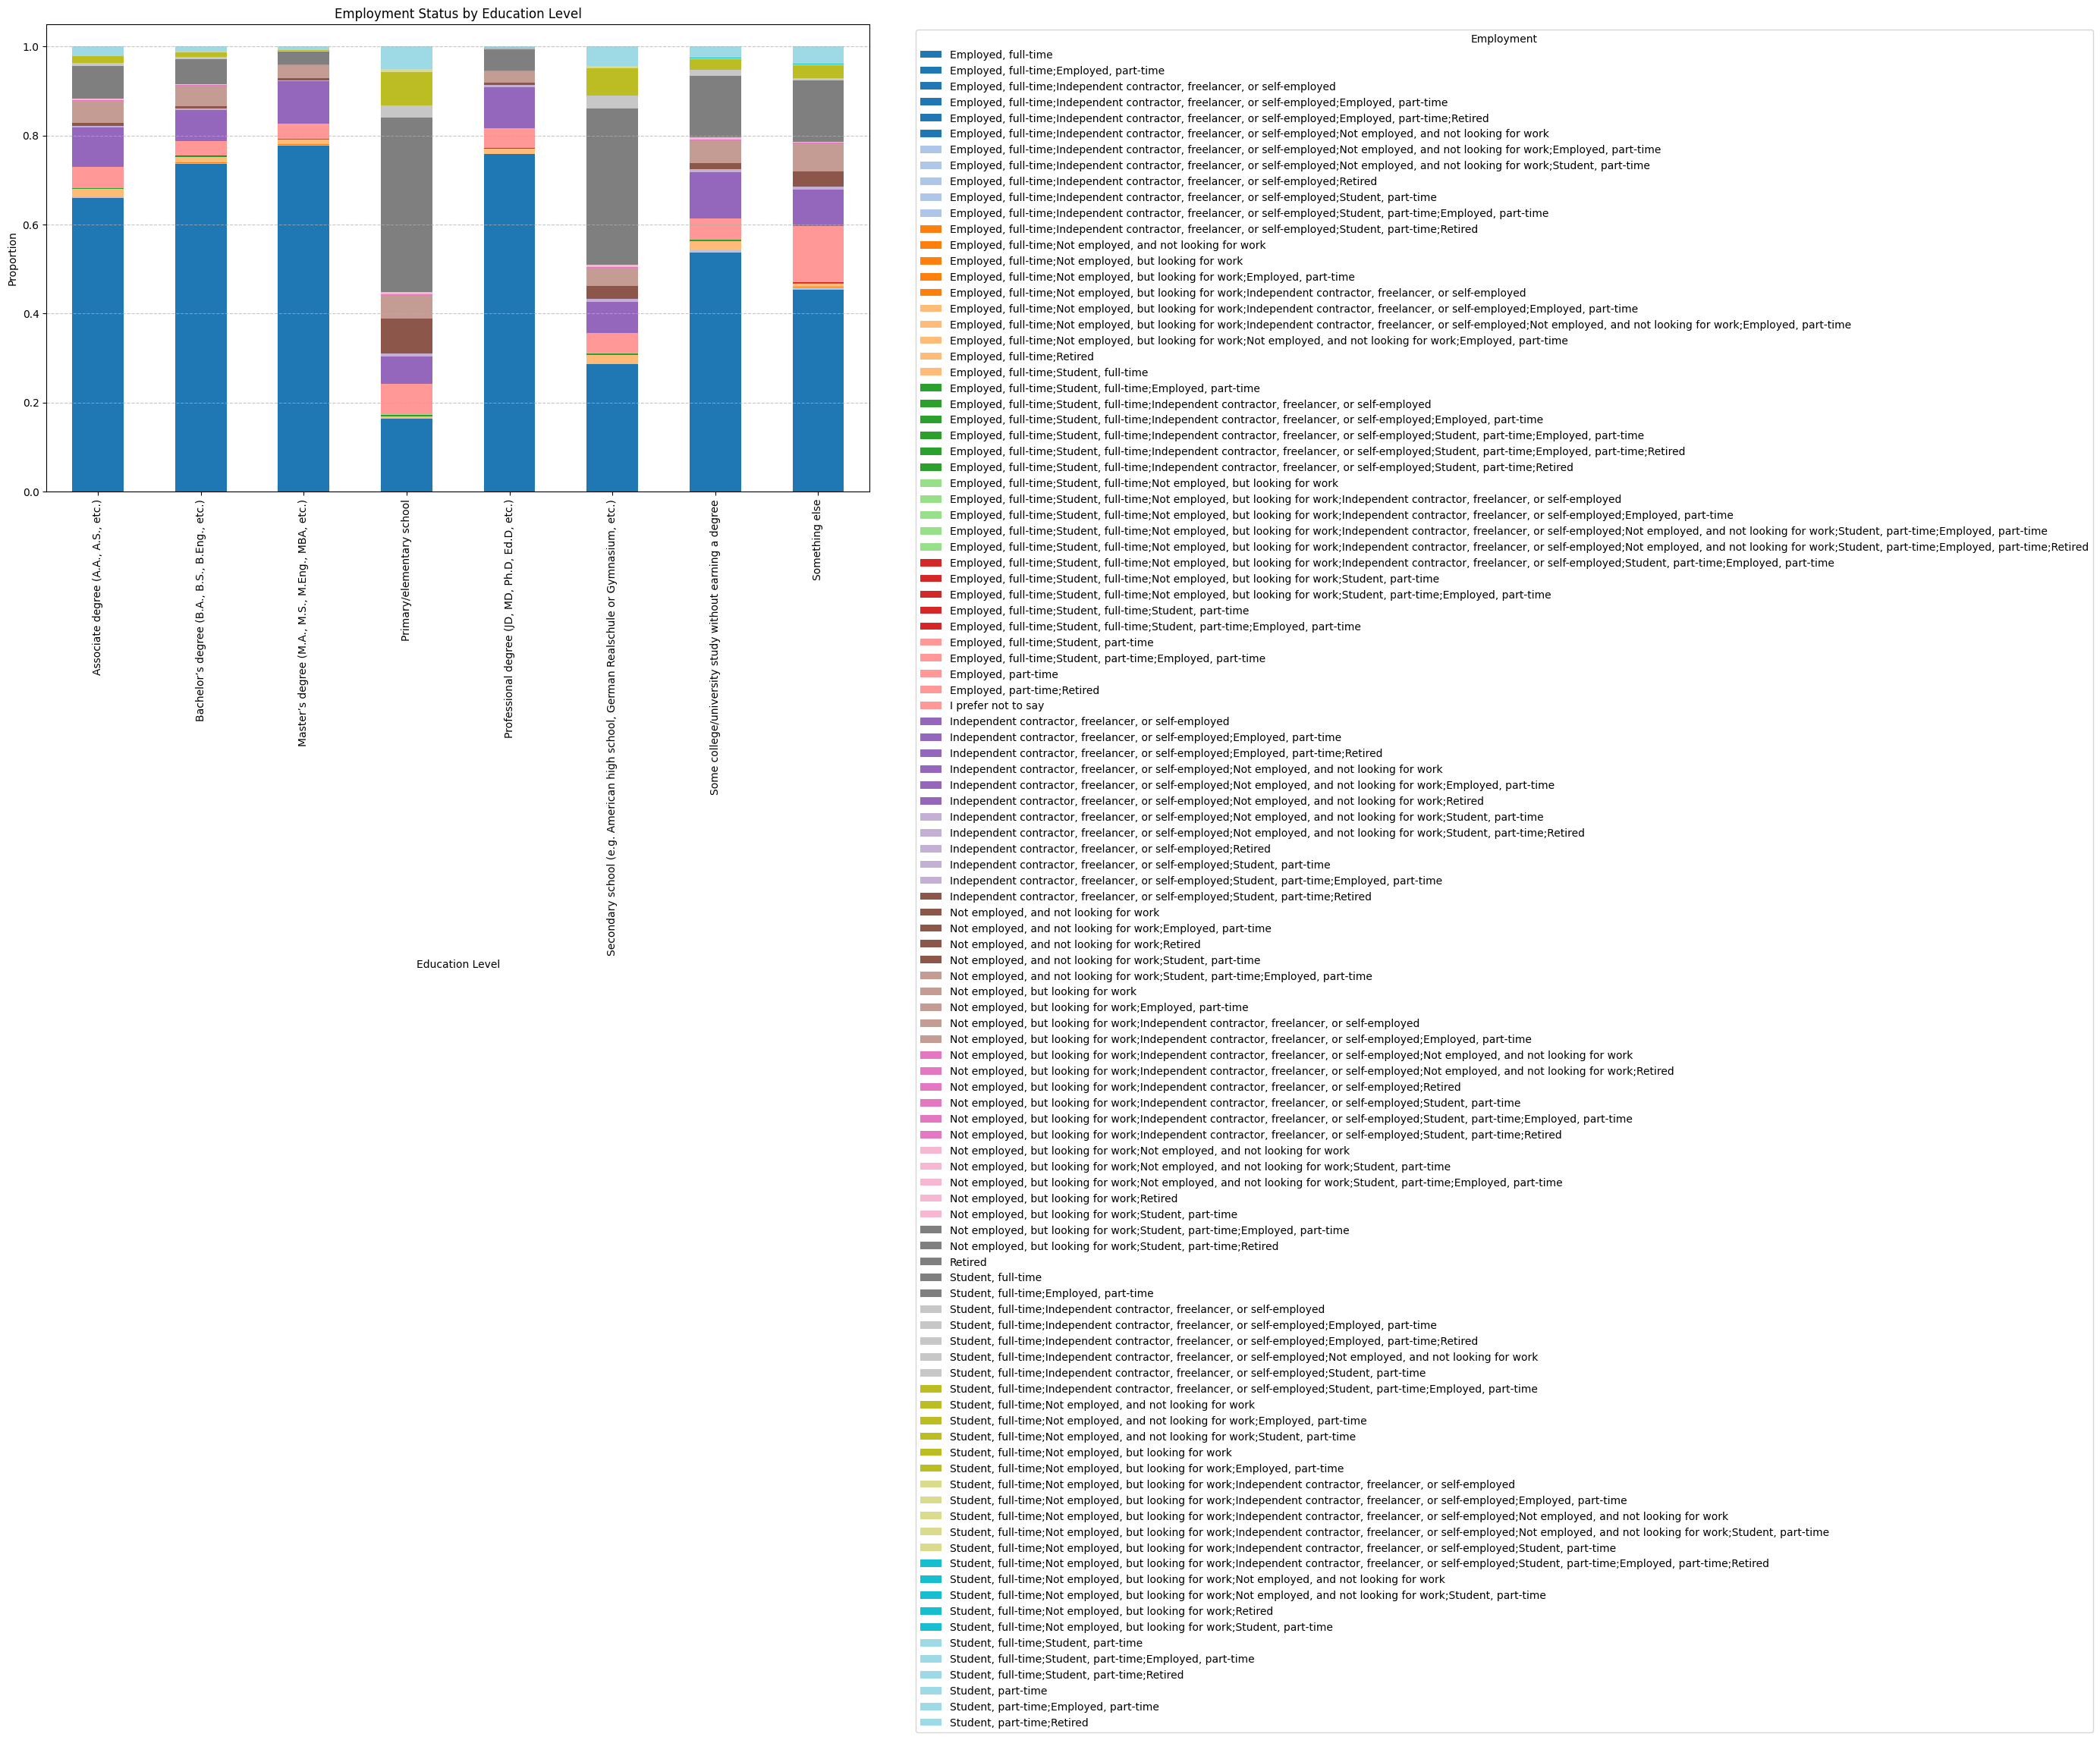

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a cross-tabulation table
crosstab = pd.crosstab(df_cleaned['EdLevel'], df_cleaned['Employment'])

# Optional: Normalize to see proportions instead of raw counts
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

# Step 2: Plot as a stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
crosstab_normalized.plot(kind='bar', stacked=True, colormap='tab20', ax=ax)

ax.set_title('Employment Status by Education Level')
ax.set_ylabel('Proportion')
ax.set_xlabel('Education Level')
ax.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save with adjusted layout
plt.savefig("employment_vs_education.png", bbox_inches='tight')
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [36]:
## Write your code here
#  Export Cleaned Data to CSV
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
